In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls
from sklearn.decomposition import NMF

In [4]:
spd = np.load("/Users/dongtianchi/Documents/GIT/SpectralReconstruction/ComputationalSpectrometers/NNLS/cleandata.npy", allow_pickle= True)

In [7]:
wavelengths = np.arange(360, 831)
mu = np.array([415, 445, 480, 515, 555, 590, 630, 680])
sigma = np.array([11.0403, 12.7388, 15.2866, 16.5605, 16.5605, 16.9851, 21.2314, 22.0807])


In [27]:
from sklearn.decomposition import NMF

class SPDNNMF:
    def __init__(self, spd_data, wavelengths, n_components):
        self.data = np.clip(spd_data, 0, None) # 将负值截断为零
        self.wavelengths = wavelengths
        self.n_components = n_components
        self.nmf = NMF(n_components=self.n_components)

    def Reconstructed_spectrum(self):
        self.scores = self.nmf.fit_transform(self.data.T)
        self.components = self.nmf.components_.T
        self.reconstructed_spectrum = np.dot(self.scores, self.components.T).T
        return self.reconstructed_spectrum, self.scores, self.components

    def Evaluate(self, Light):
        s = self.data[:, Light]
        s_re = self.reconstructed_spectrum[:, Light]
        MAE = np.mean(np.absolute(s - s_re))
        RMSE = np.sqrt(np.mean(np.square(s - s_re)))
        RRMSE = RMSE / np.mean(s_re)

        # GFC
        num = abs(np.sum(s * s_re))
        denom_s = np.sqrt(np.sum(s ** 2) + 1e-9)
        denom_s_re = np.sqrt(np.sum(s_re ** 2) + 1e-9)
        GFC = num / (denom_s * denom_s_re)

        print("MAE: ", MAE)
        print("RMSE: ", RMSE)
        print("RRMES: ", RRMSE)
        print("GFC: ", GFC)

    def Plot(self, Light):
        # 创建一个包含三个子图的图像
        fig, axs = plt.subplots(3, 1)
        s = self.data[:, Light]
        r = self.reconstructed_spectrum[:, Light]

        # 绘制真实光谱图
        axs[0].plot(self.wavelengths, s, label='True Spectrum')
        axs[0].set_xlabel('Wavelength (nm)')
        axs[0].set_ylabel('Intensity')
        axs[0].set_title('True Spectrum vs Reconstructed Spectrum')
        axs[0].legend()

        # 绘制重建光谱图
        axs[1].plot(self.wavelengths, r, label='Reconstructed Spectrum')
        axs[1].set_xlabel('Wavelength (nm)')
        axs[1].set_ylabel('Intensity')
        axs[1].legend()

        # 绘制重建光谱和真实光谱叠加的图
        axs[2].plot(self.wavelengths, s, label='True Spectrum')
        axs[2].plot(self.wavelengths, r, label='Reconstructed Spectrum')
        axs[2].set_xlabel('Wavelength (nm)')
        axs[2].set_ylabel('Intensity')
        axs[2].legend()

        plt.tight_layout()
        plt.show()


In [28]:
x = SPDNNMF(spd, wavelengths, 8)

In [29]:
x.Reconstructed_spectrum()

/opt/anaconda3/envs/ForEXE/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(array([[4.04890769e-05, 3.51548701e-05, 3.69238965e-05, ...,
         3.00131525e-05, 9.66664012e-05, 3.21116074e-05],
        [3.47549707e-05, 3.41305669e-05, 3.46522253e-05, ...,
         3.11618908e-05, 1.17284899e-04, 3.44030335e-05],
        [3.57285094e-05, 3.53269100e-05, 3.59049320e-05, ...,
         2.81399536e-05, 1.00463804e-04, 3.09602608e-05],
        ...,
        [6.70397966e-05, 1.39448596e-04, 1.21409995e-04, ...,
         3.46040032e-05, 0.00000000e+00, 3.31114346e-05],
        [6.41398026e-05, 1.34758382e-04, 1.17144883e-04, ...,
         3.33450184e-05, 0.00000000e+00, 3.19107750e-05],
        [6.15030519e-05, 1.30572251e-04, 1.13324533e-04, ...,
         3.22142033e-05, 0.00000000e+00, 3.08326265e-05]]),
 array([[0.09981757, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.08518093, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.09073237, 0.        , 0.        , ..., 0.        , 0.        ,

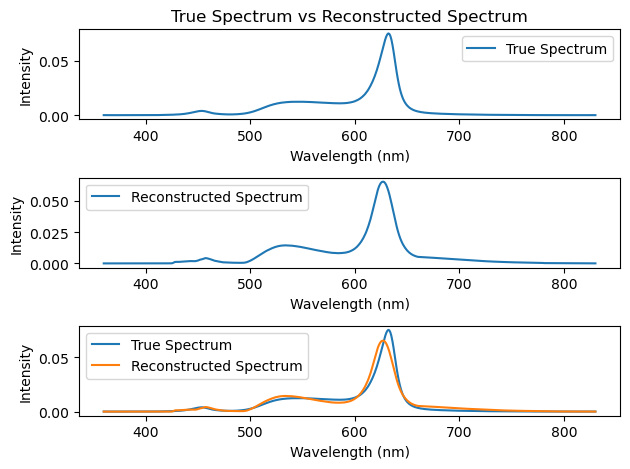

In [30]:
x.Plot(3)

In [40]:
x.Evaluate(-1)

MAE:  0.0007396110328144486
RMSE:  0.0016638142845962864
RRMES:  0.16848349755467862
GFC:  0.9956492217414721


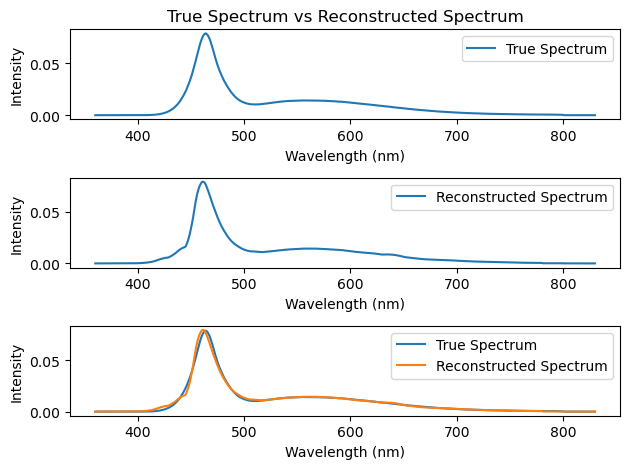

In [41]:
x.Plot(-1)

In [11]:



# 找到小于零的元素索引
indices = np.where(spd < 0)

# 打印索引
print(indices)


(array([  0,   0,   0, ..., 470, 470, 470]), array([158, 198, 226, ...,   4, 513, 881]))
